# CNNS survey

In [ ]:
pip install plotly

     |████████████████████████████████| 15.3 MB 5.9 MB/s            
Note: you may need to restart the kernel to use updated packages.



Two questions studied in the analysis
1. BMI and RBC folate association
2. Childhood Obesity and its determinants :  

    two indicators of obesity :  BMI and waist circumference

    Determinants considered -  Diet : glucose, cholesterol, types of eating,  Socio-economic Status (SES): rural urban, gender, age


# BMI and RBC folate association

1. Question: Using CNNS survey data we study the impact of BMI on RBC folate for children in the state of West Bengal in India applying non-parametric regression

    Finding : Higher BMI is associated with RBC folate

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal
import random
import plotly.express as px
import plotly.graph_objs as go
from statsmodels.nonparametric.kernel_regression import KernelReg as kr
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
import statsmodels.formula.api as smf
from statsmodels.nonparametric.kernels import aitchison_aitken
from statsmodels.nonparametric.kernels import gaussian
from scipy.stats import skew


In [ ]:
WestBengal_df = pd.read_csv('WB1.csv')

In [ ]:
WestBengal_df['area_D'] = np.where(WestBengal_df['area'] == 1, 1, 0)
#rural = 1 urban =0

In [ ]:
WestBengal_df['q102_D'] = np.where(WestBengal_df['q102'] == 1, 1, 0)
#male = 1 female =0

In [ ]:
##'q103y','q104', 'q118', 'q306a','q306j', 'q306o', 'q306p', 'q306q', 'q901r1', 'height', 'wc', 'z_wc', '@_cbmi', '@_zwfa', '@_zhfa', '@_zbfa'
## coding data based on metadata - converting to dummy variable

WestBengal_df['wi_s'] = WestBengal_df['wi_s'].replace(1, 0)
WestBengal_df['wi_s'] = WestBengal_df['wi_s'].replace(2, 0)
WestBengal_df['wi_s'] = WestBengal_df['wi_s'].replace(3, 0)
WestBengal_df['wi_s'] = WestBengal_df['wi_s'].replace(4, 1)
WestBengal_df['wi_s'] = WestBengal_df['wi_s'].replace(5, 1)

In [ ]:
## coding data based on metadata

WestBengal_df['q306a'] = WestBengal_df['q306a'].replace(8, 0.5)
WestBengal_df['q306a'] = WestBengal_df['q306a'].replace(9, 0)
WestBengal_df['q306b'] = WestBengal_df['q306b'].replace(8, 0.5)
WestBengal_df['q306b'] = WestBengal_df['q306b'].replace(9, 0)
WestBengal_df['q306c'] = WestBengal_df['q306c'].replace(8, 0.5)
WestBengal_df['q306c'] = WestBengal_df['q306c'].replace(9, 0)
WestBengal_df['q306d'] = WestBengal_df['q306d'].replace(8, 0.5)
WestBengal_df['q306d'] = WestBengal_df['q306d'].replace(9, 0)
WestBengal_df['q306e'] = WestBengal_df['q306e'].replace(8, 0.5)
WestBengal_df['q306e'] = WestBengal_df['q306e'].replace(9, 0)
WestBengal_df['q306f'] = WestBengal_df['q306f'].replace(9, 0)
WestBengal_df['q306f'] = WestBengal_df['q306f'].replace(8, 0.5)
WestBengal_df['q306g'] = WestBengal_df['q306g'].replace(9, 0)
WestBengal_df['q306g'] = WestBengal_df['q306g'].replace(8, 0.5)
WestBengal_df['q306h'] = WestBengal_df['q306h'].replace(9, 0)
WestBengal_df['q306h'] = WestBengal_df['q306h'].replace(8, 0.5)
WestBengal_df['q306i'] = WestBengal_df['q306i'].replace(9, 0)
WestBengal_df['q306i'] = WestBengal_df['q306i'].replace(8, 0.5)
WestBengal_df['q306j'] = WestBengal_df['q306j'].replace(9, 0)
WestBengal_df['q306j'] = WestBengal_df['q306j'].replace(8, 0.5)
WestBengal_df['q306k'] = WestBengal_df['q306k'].replace(9, 0)
WestBengal_df['q306k'] = WestBengal_df['q306k'].replace(8, 0.5)
WestBengal_df['q306l'] = WestBengal_df['q306l'].replace(9, 0)
WestBengal_df['q306l'] = WestBengal_df['q306l'].replace(8, 0.5)
WestBengal_df['q306m'] = WestBengal_df['q306m'].replace(9, 0)
WestBengal_df['q306m'] = WestBengal_df['q306m'].replace(8, 0.5)
WestBengal_df['q306n'] = WestBengal_df['q306n'].replace(9, 0)
WestBengal_df['q306n'] = WestBengal_df['q306n'].replace(8, 0.5)
WestBengal_df['q306o'] = WestBengal_df['q306o'].replace(9, 0)
WestBengal_df['q306o'] = WestBengal_df['q306o'].replace(8, 0.5)
WestBengal_df['q306p'] = WestBengal_df['q306p'].replace(9, 0)
WestBengal_df['q306p'] = WestBengal_df['q306p'].replace(8, 0.5)
WestBengal_df['q306q'] = WestBengal_df['q306q'].replace(9, 0)
WestBengal_df['q306q'] = WestBengal_df['q306q'].replace(8, 0.5)

In [ ]:
WestBengal_df

,caseid,state,area,psu_no,psu_no_ov,region,hh_no,int_d,int_m,int_y,...,nat_weight_bio,nat_weight_survey,fasting_status,pct,percent,pct1,percent1,treat,area_D,q102_D
0,19101216405,19,1,12,1147,3,164,6,9,2018,...,3.866231,5.059042,YES,13.146570,5.0,-3.28,5.0,1,1,1
1,19102033703,19,1,20,1155,3,337,24,7,2018,...,4.186183,5.325547,YES,13.794621,10.0,-2.83,10.0,1,1,0
2,19211010504,19,2,110,1245,3,105,19,8,2018,...,NaN,0.774117,,14.276794,15.0,-2.47,15.0,1,0,0
3,19204318205,19,2,43,1178,3,182,28,8,2018,...,NaN,0.542395,,14.888384,20.0,-2.22,20.0,1,0,1
4,19208010905,19,2,80,1215,3,109,29,6,2018,...,NaN,0.470647,,15.402600,25.0,-2.02,25.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,19102218803,19,1,22,1157,3,188,1,7,2018,...,NaN,4.505695,,NaN,NaN,NaN,NaN,1,1,1
1464,19203816503,19,2,38,1173,3,165,18,9,2018,...,NaN,0.332355,,NaN,NaN,NaN,NaN,1,0,0
1465,19208303803,19,2,83,1218,3,38,24,6,2018,...,0.344955,0.398277,YES,NaN,NaN,NaN,NaN,1,0,1
1466,19102123804,19,1,21,1156,3,238,4,7,2018,...,5.487847,7.480165,,NaN,NaN,NaN,NaN,1,1,0


In [ ]:
WestBengal_df = WestBengal_df.replace({' ': np.nan})

##'q103y','q104', 'q118', 'q306a','q306j', 'q306o', 'q306p', 'q306q', 'q901r1', 'height', 'wc', 'z_wc', '@_cbmi', '@_zwfa', '@_zhfa', '@_zbfa'

In [ ]:
WestBengal_df1 = WestBengal_df.dropna(subset=['q104', 'rbcf_1unic','X___cbmi','area_D','q118','q102_D','vtb12c_unic','muac', 'X___zbfa'])

In [ ]:
cont_df1 = WestBengal_df1[['q104', 'rbcf_1unic', 'X___cbmi','chohdl_dunic','hb_a1c_unic', 'cho_dunic', 'tri_dunic', 'dirldl_dunic2','glus_unic', 'tsft','muac']]

In [ ]:
cont_df2 = WestBengal_df1[['q104', 'rbcf_1unic', 'X___zbfa','area_D','q102_D','q118', 'X___cbmi','state_weight_bio','muac']]
cont_df2

,q104,rbcf_1unic,X___zbfa,area_D,q102_D,q118,X___cbmi,state_weight_bio,muac
1,10,671.76,0.14,1,0,6.0,17.264424,2.731270,20.400000
9,10,254.18,-0.01,0,1,9.0,16.698931,0.209256,19.849998
24,10,450.55,-0.82,1,0,10.0,15.164392,0.999609,19.750000
26,10,349.82,-0.16,0,1,4.0,16.250218,0.281814,21.750000
31,10,779.73,-2.67,1,1,5.0,13.307631,0.822882,16.950001
...,...,...,...,...,...,...,...,...,...
1423,19,306.21,1.44,1,0,9.0,26.881574,1.849649,29.200001
1441,19,303.54,-2.23,0,1,5.0,17.136107,0.296577,24.400000
1448,19,383.35,0.00,0,0,5.0,21.411688,0.604815,24.049999
1449,19,548.66,-0.82,1,1,8.0,20.032230,1.387558,27.250000


In [ ]:
cont_df1 = cont_df1.astype(float)
cont_df2 = cont_df2.astype(float)

In [ ]:
mask =cont_df2['X___cbmi'] > 100

# Drop the rows where col1 is greater than 100
cont_df2 = cont_df2.drop(index=cont_df2[mask].index)

# Print the resulting DataFrame
cont_df2



,q104,rbcf_1unic,X___zbfa,area_D,q102_D,q118,X___cbmi,state_weight_bio,muac
1,10.0,671.76,0.14,1.0,0.0,6.0,17.264424,2.731270,20.400000
9,10.0,254.18,-0.01,0.0,1.0,9.0,16.698931,0.209256,19.849998
24,10.0,450.55,-0.82,1.0,0.0,10.0,15.164392,0.999609,19.750000
26,10.0,349.82,-0.16,0.0,1.0,4.0,16.250218,0.281814,21.750000
31,10.0,779.73,-2.67,1.0,1.0,5.0,13.307631,0.822882,16.950001
...,...,...,...,...,...,...,...,...,...
1423,19.0,306.21,1.44,1.0,0.0,9.0,26.881574,1.849649,29.200001
1441,19.0,303.54,-2.23,0.0,1.0,5.0,17.136107,0.296577,24.400000
1448,19.0,383.35,0.00,0.0,0.0,5.0,21.411688,0.604815,24.049999
1449,19.0,548.66,-0.82,1.0,1.0,8.0,20.032230,1.387558,27.250000


In [ ]:
print(cont_df2.max())
print(cont_df2.min())

q104                 19.000000
rbcf_1unic          968.960000
X___zbfa              3.350000
area_D                1.000000
q102_D                1.000000
q118                 98.000000
X___cbmi             35.259872
state_weight_bio      9.249253
muac                 35.650002
dtype: float64
q104                 10.000000
rbcf_1unic          166.120000
X___zbfa             -4.860000
area_D                0.000000
q102_D                0.000000
q118                  0.000000
X___cbmi             10.934358
state_weight_bio      0.056183
muac                 11.800000
dtype: float64


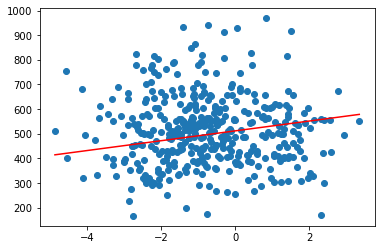

In [ ]:
plt.scatter(cont_df2['X___zbfa'],cont_df2['rbcf_1unic'])
m, c = np.polyfit(cont_df2['X___zbfa'], cont_df2['rbcf_1unic'], 1)  # 1 indicates a linear fit

# Generate the line values
line_x = [min(cont_df2['X___zbfa']), max(cont_df2['X___zbfa'])]
line_y = [20 * x_i + c for x_i in line_x]

# Plot the line
plt.plot(line_x, line_y, color='red')

plt.show()

In [ ]:
type(cont_df1.rbcf_1unic[8])

numpy.float64

In [ ]:
cont_df2

,q104,rbcf_1unic,@_zbfa,area_D,q102_D,q118,@_cbmi,state_weight_bio,muac
8,14.0,747.30,-0.51,1.0,1.0,8.0,18.022873,0.513892,21.750000
14,16.0,334.09,-2.42,1.0,1.0,5.0,16.046692,0.954705,19.549999
23,11.0,382.03,-0.83,1.0,0.0,5.0,15.626282,1.752203,19.650002
28,11.0,554.23,2.13,1.0,1.0,5.0,23.004149,2.082869,25.349998
29,11.0,251.29,-1.84,1.0,1.0,5.0,14.471173,4.165739,18.799999
...,...,...,...,...,...,...,...,...,...
1451,13.0,440.52,-0.32,0.0,1.0,9.0,17.686245,0.281939,22.500000
1452,18.0,493.68,-3.02,0.0,1.0,9.0,15.772297,1.204101,20.200001
1457,12.0,418.17,-2.77,0.0,1.0,5.0,13.650417,0.725245,16.500000
1458,18.0,387.86,-1.00,0.0,0.0,7.0,18.648954,0.409597,26.000000


In [ ]:
corr_matrix = cont_df2.corr()

In [ ]:
corr_matrix

,q104,rbcf_1unic,@_zbfa,area_D,q102_D,q118,@_cbmi,state_weight_bio,muac
q104,1.000000,-0.139010,0.098040,-0.021249,0.013407,-0.061890,0.432285,0.030020,0.537653
rbcf_1unic,-0.139010,1.000000,-0.011514,0.120348,-0.169376,-0.019362,-0.072562,0.030857,-0.114608
@_zbfa,0.098040,-0.011514,1.000000,-0.199755,-0.101804,-0.008625,0.893306,-0.138183,0.789250
area_D,-0.021249,0.120348,-0.199755,1.000000,0.095682,-0.038845,-0.188675,0.666667,-0.148907
q102_D,0.013407,-0.169376,-0.101804,0.095682,1.000000,0.055511,-0.073639,0.062957,0.008773
q118,-0.061890,-0.019362,-0.008625,-0.038845,0.055511,1.000000,-0.027386,-0.068616,-0.031294
@_cbmi,0.432285,-0.072562,0.893306,-0.188675,-0.073639,-0.027386,1.000000,-0.117894,0.919484
state_weight_bio,0.030020,0.030857,-0.138183,0.666667,0.062957,-0.068616,-0.117894,1.000000,-0.088581
muac,0.537653,-0.114608,0.789250,-0.148907,0.008773,-0.031294,0.919484,-0.088581,1.000000


In [ ]:
percentiles = np.percentile(cont_df2['@_cbmi'], [5,85, 95, 100])
percentiles

array([13.35333079, 22.79700244, 26.23723776, 35.25987194])

In [ ]:
cont_df2['category'] = pd.cut(cont_df2['@_cbmi'], bins=[-float('inf'), 13.21278697, 21.73085635, float('inf')], labels=['UW', 'NW', 'OW'])

In [ ]:
means = cont_df2['rbcf_1unic'].groupby(cont_df2['category']).mean()
means

category
UW    496.338333
NW    518.667613
OW    490.387403
Name: rbcf_1unic, dtype: float64

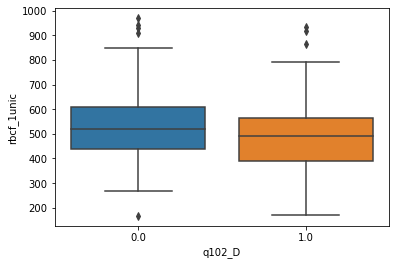

In [ ]:
#Create a boxplot with x on the y-axis and category on the x-axis
sns.boxplot(data=cont_df2, x='q102_D', y='rbcf_1unic')

#Show the plot
plt.show()

## Parametric methods

In [ ]:
### all children in the dataset


X = cont_df2[[ '@_cbmi','area_D','q102_D','q104' ]]
Y = cont_df2[['rbcf_1unic']]

X = sm.add_constant(X)
Y = Y.astype(float)

parameter_linear_modelwls = sm.WLS(Y, X, weights=(cont_df2[['state_weight_bio']])**(-2)).fit()
print(parameter_linear_modelwls.summary())


# cereals, leafy veg, sweets - controls

                            WLS Regression Results                            
Dep. Variable:             rbcf_1unic   R-squared:                       0.156
Model:                            WLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     18.51
Date:                Sat, 20 May 2023   Prob (F-statistic):           5.75e-14
Time:                        12:00:19   Log-Likelihood:                -2871.7
No. Observations:                 405   AIC:                             5753.
Df Residuals:                     400   BIC:                             5773.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        568.8648     44.541     12.772      0.0

In [ ]:
y_pred_param = parameter_linear_modelwls.predict(X)

In [ ]:
residuals_linearwls = parameter_linear_modelwls.resid
MSE_parmwls = np.sum(residuals_linearwls**2)
MSE_parmwls

7819471.743602125

In [ ]:
type(cont_df2[['@_zbfa']].values)

numpy.ndarray

In [ ]:
### individuals with normal BMI

subset = cont_df2[(cont_df2['@_cbmi'] >= 13.35333079) & (cont_df2['@_cbmi'] <= 22.79700244)]
X = subset[[ '@_zbfa','area_D','q102_D','q104' ]]
Y = subset[['rbcf_1unic']]

X = sm.add_constant(X)
Y = Y.astype(float)

parameter_linear_modelwls = sm.WLS(Y, X, weights=(subset[['state_weight_survey']])**(-2)).fit()
print(parameter_linear_modelwls.summary())


# cereals, leafy veg, sweets - controls

                            WLS Regression Results                            
Dep. Variable:             rbcf_1unic   R-squared:                       0.185
Model:                            WLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     18.07
Date:                Sun, 02 Apr 2023   Prob (F-statistic):           2.18e-13
Time:                        18:36:33   Log-Likelihood:                -2330.1
No. Observations:                 323   AIC:                             4670.
Df Residuals:                     318   BIC:                             4689.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        586.9728     50.217     11.689      0.0

In [ ]:
### individuals with High BMI

subsetobs = cont_df2[ (cont_df2['@_cbmi'] >= 22.79700244)]
X = subsetobs[[ '@_zbfa','area_D','q102_D','q104']]
Y = subsetobs[['rbcf_1unic']]

X = sm.add_constant(X)
Y = Y.astype(float)

parameter_linear_modelwlsobs = sm.WLS(Y, X, weights=(subsetobs[['state_weight_survey']])**(2)).fit()
print(parameter_linear_modelwlsobs.summary())




                            WLS Regression Results                            
Dep. Variable:             rbcf_1unic   R-squared:                       0.352
Model:                            WLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     7.592
Date:                Sun, 02 Apr 2023   Prob (F-statistic):           5.85e-05
Time:                        18:34:42   Log-Likelihood:                -428.84
No. Observations:                  61   AIC:                             867.7
Df Residuals:                      56   BIC:                             878.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        992.3066    116.216      8.538      0.0

In [ ]:

### individuals with low BMI


subsetuw = cont_df2[ (cont_df2['@_cbmi'] <= 13.35333079)]
X = subsetuw[[ '@_zbfa','area_D','q102_D','q104']]
Y = subsetuw[['rbcf_1unic']]

X = sm.add_constant(X)
Y = Y.astype(float)

parameter_linear_modelwlsuw = sm.WLS(Y, X, weights=(subsetuw[['state_weight_survey']])**(2)).fit()
print(parameter_linear_modelwlsuw.summary())




                            WLS Regression Results                            
Dep. Variable:             rbcf_1unic   R-squared:                       0.319
Model:                            WLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     1.872
Date:                Sun, 02 Apr 2023   Prob (F-statistic):              0.165
Time:                        18:37:36   Log-Likelihood:                -145.19
No. Observations:                  21   AIC:                             300.4
Df Residuals:                      16   BIC:                             305.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1571.1720    587.928      2.672      0.0

**Finding** - Individuals with normal BMI has a positive association between BMi and RBC folate. While we did not notice any significant effect of BMI on RBC folate for individuals with low and high BMI according to the standards of WHO. However, the last statement is inconclusive given the sample size is too small.

## Non- parametric Methods - kernel estimation

In [ ]:
 cont_df2[['@_zbfa']]


,@_zbfa
8,-0.51
14,-2.42
23,-0.83
28,2.13
29,-1.84
...,...
1451,-0.32
1452,-3.02
1457,-2.77
1458,-1.00


In [ ]:
new_x1 =  cont_df2['q102_D'].values
new_x =  cont_df2['@_zbfa'].values
Y =  cont_df2['rbcf_1unic'].values
weight =  cont_df2['state_weight_survey'].values



In [ ]:
## finding parameters by Silverman;s method for non-parametric regression
np.random.seed(1)
# xwidth controls the range of x values.
xwidth = 20
kernel_x = np.arange(-xwidth,xwidth, 0.1)
#bandwidth plugin values by Silverman
std = new_x.std()
q1 = np.quantile(new_x, 0.25)
q3 = np.quantile(new_x, 0.75)
iqr = q3 - q1
h_plugin = 1.06*min(iqr,std)*(len(new_x))**(1/6)
n = len(new_x1)
p = np.mean(new_x1)
h_plugin1 = 0.5 * (1 + (n * (0.5 - p) ** 2) / (p * (1 - p))) ** (-1)

h_plugin,h_plugin1


(4.339084239975044, 0.21641283313169646)

In [ ]:
def aitchison_aitken(h, Xi, x, num_levels=None):
    """
    The Aitchison-Aitken kernel, used for unordered discrete random variables.

    Parameters
    ----------
    h : 1-D ndarray, shape (K,)
        The bandwidths used to estimate the value of the kernel function.
    Xi : 2-D ndarray of ints, shape (nobs, K)
        The value of the training set.
    x: 1-D ndarray, shape (K,)
        The value at which the kernel density is being estimated.
    num_levels: bool, optional
        Gives the user the option to specify the number of levels for the
        random variable.  If False, the number of levels is calculated from
        the data.

    Returns
    -------
    kernel_value : ndarray, shape (nobs, K)
        The value of the kernel function at each training point for each var.
    """
    #Xi = Xi.reshape(Xi.size)  # seems needed in case Xi is scalar
    if num_levels is None:
        num_levels = 2
    if num_levels < 2:
        print(num_levels)
        raise ValueError('num_levels must be at least 2')

    kernel_value = np.ones(Xi.size) * h / (num_levels - 1)
    idx = Xi == x
    kernel_value[idx] = (idx * (1 - h))[idx]
    return kernel_value

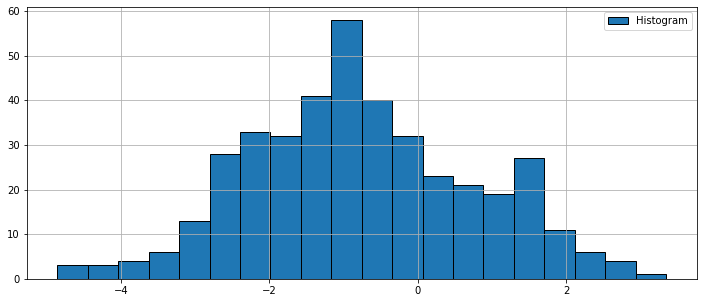

In [ ]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111)
lines = ax.hist(new_x, bins=20, edgecolor="k", label="Histogram")

ax.legend(loc="best")
ax.grid(True, zorder=-5)

In [ ]:
# We are selecting a single point and calculating the Kernel value
input_x = new_x[0]
input_x1 = new_x1[0]
#col1 = gauss_const(bw_manual)
#col2= gauss_exp(kernel_x, input_x, bw_manual)

### defining kernel functions with weight indicator for survey data

def kernel_gaussian(h_plugin, new_x,weight):
    kernel_gaussian = []
    for i in range(len(new_x)):
        kernel_gaussian.append((1/(h_plugin*len(new_x)))*np.sum(gaussian(h_plugin, new_x, new_x[i])*weight[i]))
    return kernel_gaussian

def kernel_aitchison_aitken(h_plugin1, new_x1,weight):
    kernel_aitchison_aitken = []
    for i in range(len(new_x)):
        kernel_aitchison_aitken.append(np.sum(aitchison_aitken_reg(h_plugin1, new_x, new_x[i])*weight[i]))
    return kernel_aitchison_aitken

In [ ]:
kernel_est = kernel_gaussian(h_plugin, new_x,weight)


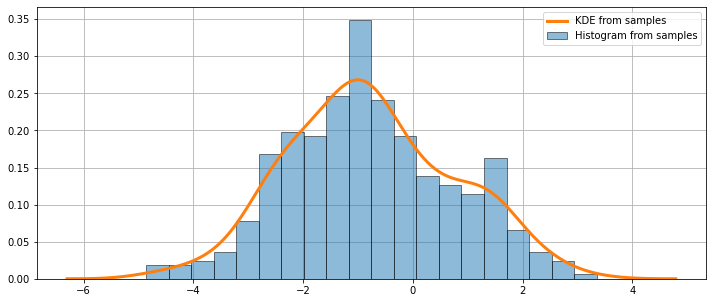

In [ ]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111)

kde = sm.nonparametric.KDEUnivariate(new_x)
kde.fit()  # Estimate the densities
# Plot the histogram
ax.hist(
    new_x,
    bins=20,
    density=True,
    label="Histogram from samples",
    zorder=5,
    edgecolor="k",
    alpha=0.5,
)

# Plot the KDE as fitted using the default arguments
ax.plot(kde.support, kde.density, lw=3, label="KDE from samples", zorder=10)
ax.legend(loc="best")
ax.grid(True, zorder=-5)


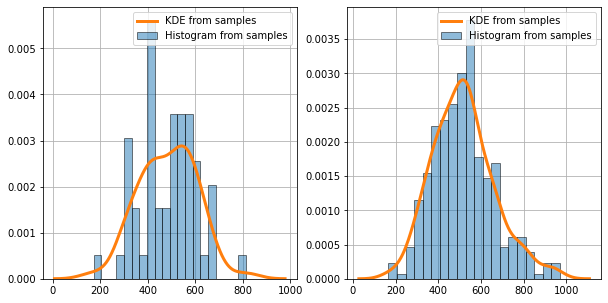

In [ ]:
subset

Yow =  subsetobs['rbcf_1unic'].values
Ynw =  subset['rbcf_1unic'].values
weightnw =  cont_df2['state_weight_survey'].values


fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))


kde = sm.nonparametric.KDEUnivariate(Yow)
kde.fit()  # Estimate the densities
# Plot the histogram
ax1.hist(
    Yow,
    bins=20,
    density=True,
    label="Histogram from samples",
    zorder=5,
    edgecolor="k",
    alpha=0.5,
)

# Plot the KDE as fitted using the default arguments
ax1.plot(kde.support, kde.density, lw=3, label="KDE from samples", zorder=10)
ax1.legend(loc="best")
ax1.grid(True, zorder=-5)

kdeY = sm.nonparametric.KDEUnivariate(Ynw)
kdeY.fit()  # Estimate the densities
# Plot the histogram
ax2.hist(
    Ynw,
    bins=20,
    density=True,
    label="Histogram from samples",
    zorder=5,
    edgecolor="k",
    alpha=0.5,
)

# Plot the KDE as fitted using the default arguments
ax2.plot(kdeY.support, kdeY.density, lw=3, label="KDE from samples", zorder=10)
ax2.legend(loc="best")
ax2.grid(True, zorder=-5)

In [ ]:
len(new_x)

405

In [ ]:
kernel_function(bw_manual, new_x, input_x)

array([1.99471140e+000, 7.36823067e-196, 1.99471140e+000, ...,
       8.76415025e-002, 8.76415025e-002, 2.76535477e-049])

In [ ]:
aitchison_aitken_reg(bw_manual, new_x1[0], input_x1)

0.8

In [ ]:
weight

array([0.86663103, 0.57923585, 0.57923585, ..., 0.45149684, 0.45149684,
       0.38990411])

In [ ]:
0.8*1.4867195147343004e-06*0.86663103

1.0307498115002296e-06

In [ ]:
gaussian(bw_manual, new_x[0], input_x)

1.4867195147343004e-06

In [ ]:
aitchison_aitken_reg(bw_manual, new_x1[0], input_x1)*gaussian(bw_manual, new_x[0], input_x)*weight[0]

1.0307498127328711e-06

In [ ]:
new_x1

array([1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0.,
       1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1.,
       0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1.,
       0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0.,
       0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1.,
       1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1.,
       0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0.,
       1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0.,
       0., 0., 0., 1., 1.

In [ ]:
def weights(h_plugin,h_plugin1, input_x1,input_x, all_input_values, all_input_values1,weight):
    w_row = []
    for i in range(len(all_input_values)):
        ki = aitchison_aitken_reg(h_plugin1, all_input_values1[i], input_x1)*gaussian(h_plugin, all_input_values[i], input_x)*weight[i]
        ki_sum = np.sum(aitchison_aitken(h_plugin1, all_input_values1, input_x1)*gaussian(h_plugin, all_input_values, input_x)*weight)
        if ki_sum == 0:
            w_row.append(0)
        else:
            w_row.append(ki/ki_sum)
    return w_row
def single_y_pred(h_plugin,h_plugin1, input_x1,input_x, new_x, new_x1,weight):
    w = weights(h_plugin,h_plugin1, input_x1,input_x, new_x, new_x1,weight)
    y_single = np.sum(np.dot(Y,w))
    return y_single
ypred_single = single_y_pred(h_plugin,h_plugin1, input_x1,input_x, new_x, new_x1,weight)
ypred_single

504.0476368232315

In [ ]:
Y_pred = []
for i in range(len(new_x)):
    Y_single = single_y_pred(h_plugin,h_plugin1, new_x[i], new_x1[i], new_x, new_x1,weight)
    Y_pred.append(Y_single)

In [ ]:
### calculating MSE for the residuals using the non-parametric regression

residuals = np.subtract(Y_pred, Y)
residuals
mse_non = np.sum(residuals**2)
mse_non

8030949.395412842

## Semi parametric methods

Estimating the marginal effect for each outcome by semi-parametric methods ; **partially linear model** and **Single Index** estimator in R

Corresponding R code is saved in the same folder. Below we show the output from R code.

![Partially Linear model](data:application/octet-stream;base64,iVBORw0KGgoAAAANSUhEUgAAArwAAAGwCAMAAAB8TkaXAAAAY1BMVEUAAAAAADoAAGYAOjoAOpAAZrY6AAA6ADo6AGY6Ojo6kNtmAABmADpmOpBmZmZmkJBmtv+QOgCQZgCQkGaQ2/+2ZgC225C2/7a2///bkDrb/7bb////tmb/25D//7b//9v///+VpmGTAAAACXBIWXMAAA7DAAAOwwHHb6hkAAAW6UlEQVR4nO3dDXvjuK0F4DPTTdqOt+3kdtyuu47t//8rr6iP2IktiwBBgpTO232msx4QQDBcRVYSCReiRsG7ASIteDdApAXvBoi04N0AkRa8GyDSgncDRFrwboBIC94NEGnBuwEiLXg3QKQF7waItODdAJEWvBsg0oJ3A0Ra8G6ASAveDRBpwbsBIi14N0CkBe8GiLTg3QCRFrwbINKCdwNEWvBugEgL3g0QacG7ASIteDdApAXvBoi04N0AkRa8GyDSgncDRFrwboBIC94NEGnBuwEiLXg3QKQF7waItODdAJEWvBsg0oJ3A0Ra8G6ASAvG6TbCdmqc7mfR8zAer226WmFTZUuDeaBLulphU2VLg3mgS7q6XD+h4UlUzgZ8ypYG80CXdFV4cCqGudjMnfiULQ3mgS7p3M28fXj0WgFOZUuDeaBLOk/P3vfOvZ6ZU9nSYB7oks7L0vWap3+Yj1PZ0mAe6JLOQdSFxsWAPJzKlgbzQJd0hUVfII+LMudUtjSYB7qkK0jylR1u3qxgHuiSLj/xlySHVVl6qbVsaTAPdEmXl3jPXldatlF92dJgHvg8i+4A5iex14SlmmqtTTcRzANd0mVhsAtS17dVtjSYB7qkM2d0+LLI0U7Z0mAe6JLOkuXnXas8bZQtDeaBLumsWJ8vmiarvmxpMA90SZco2xsd84RVly0N5oEu6RJkfXOeL3ONZUuDeaBLOp38V5XyZq+tbGkwD3RJp2igyNXQAiUqKlsazANd0gmLF7uMX6hMJWVLg3lg7/w2vAH6/odJOjuFv/6Up1S10y0M5oHBAT+G3xyn3ySlM+LwddMs9eqcrgOYB17CkeFjqIff/kxOl8jzC/45atY1XU8wD+ycdj+n3x5nPrVJ0iXw/iaVHMXrma43mAdeKjk2VPHdVTkaqGK6VYB5YHDAeHBwOiurYd/2kCOp93SrAXHgafeyHH3aDaeZM0eGnOOtZuMGkC6ofbpVgTxw343t269SdUVJq9q4AcQr6p1ufaAKPIZdEnGIMKgbnbC2fduDZlGF060TtIHnt9lL5N2ntXAudixxGb3yH3yBcl0l060cVIELx4Z+vP074ZvLOsq6z1qqds9+gGZRHdNtAMSB/dcmn5+VhfGOg811MaeBjRtAuqCO6TYC4sCI98NhvO+v/Xi/XEa3+PnWis8S7kC6wH26LYF54CXnsaG1vxhkyMkj7wTmgZfpOuTLZXpzkZhuXNHaxg2QIWeW6TYJssDTP+aui3/RTbg7c5v9EpBwvC3u2x5E0U7TbRZkgd3Uki5Ayuq2fwoHUXTZ6bYP0sADMHN9xrZu03v2A4Txpaa7DpAH7ucvjo9SL6OvY+MGEK/IP931gCLw/fX5D6GkXEZv+yzhDuRLck43Sjt/ARAHnt+ijg2Kiznr2rc9SBfkm24sJK4vCNLAfcRZ2fxl9Nm6K9y4AYTxmaYrgNQEBUEWGPd+WHZsWNmZwicQReeYrhSmfxoAWWDclUjJZfTV7tseRNH205XDejdvNF5G7yFP2pzTReL6gmAe6JKuVmiwbDsncTAPdElXK2yqbGkwD3RJVyu0WDZtdUEwD3RJVyu0WDZtdUEwD3RJVyu0WDZtdUEwD3RJVyu0WDZtdUEwD3RJVyu0WDZtdUEwD3RJVytsqmxpMA98nqX97y8XQdlqnG5ioEu6WmFTZUuDeaBLulqhxbJpqwuCeaBLulqhxbJpqwuCeaBLulqhxbJpqwuCeaBLulqhxbJpq0WV0t5aRi9OqpI9Xa3QYtm01cJCKcWi16YUyZ+uVthUWSHc/JqQwDLQJV2tsKmyQrj5NSGBZWCPz2gcIEvWlUwXN78mJLAMDPiMxhFyJM093bTVokKo75yXTwqbIEPO7NNNWy2qVOHVBj6jcYIMObNPN211wVLRqyVleOSdIEPOFR15a9y8fEbjBDmS5p5u2uqCpaJXy8rwGY0DZMnK6Q5gHuiSrlbYVNnSYB7okq5W2FTZ0mAeeOHtj6+QIWf26aatLlgqerWkDJ/ROEGGnNmnm7a6YKno1ZIyfFLYBBlyZp9u2uqCpaJXS8rwGY0TZMiZfbppqwuWil4tKRNzbNgIwdQ4XbHYkUUHXqJufyxLHVHcIkmZiFTC6cohR1LXUsIyS7c/lqWOKG6RpEyEAcl05ZAlq2epjGWWU0cUt0hSJqJ6WF2pjGWWU0cUt0hSJqJ6WF0pTZnxPXF66ojiFknKRFiJnK4c8qR1LCUpM33jSLD0SLyo1BHFLZKUiUglnK4cMuT0LSUqM76V4JE3C9l05ZAnrWMpWZnTLlyB5ObNQzRdOeRJ61hKWmb/7Rc3bzaC6cohT1rHUuIyB/zINl7idCUgXvH++heONxtOVwDyJee35UeYkxanGw/eDRBpwbsBIi14N0CkBe8GiLTg3QCRFrwbINKCdwNEWvBugEgL3g0QacG7ASItZMp7RPhZwhnXH5R9GvbM+9/+SEvUPwDih00zDSj6sQ1/OfkhT9pj+CnY2Wm9//VXTNgTp13/wwb6ROe3LvoQ9mx6Mw0o+rGNfzn5IUvW4S7f+5eZP57uCLMQNu84/qSMPtHwjYeHbn1yMw0o+rEdM/0Y0z1kyXrdGg8dXqLCZh3xY9hyyYnC4TcxRwtKfmwffzn5IUvW4VPx7Mew//twvrkQ9sywKDXRvlth0Ez1Cn9sbW/e4fRq7iRr+Fmt/Y+FsOcVwnxSE4UfebRopnqFP7Y1b94x5vsfqZs3MdERHyeBac1Uj5tXIObTVHcelnzakJTo9p5gac1Uj6cNAjFvELqBJryPuN28ukSH2/vZpTVTvcIfW9ub9/mlmWGU3UeYcAWnn09KoumpZxbNVK/wx9b25l24KN5PsXuPlHDtfLzaoE70/joddw2aqV/Zj63xzdsd2J59OXIPDAe+52FPjPNRJzoMNwULa9KbaUDRj631zUuUHbwbINKCdwNEWvBugEgL3g0QacG7ASIteDdApAXvBoi04N0AkRa8GyDSgncDRFrwboBIC94NEGnBuwEiLXg3QKQF7waItODdAJEWvBsg0oJ3A0Ra8G6ASAveDRBpwbsBIi14N0CkBe8GiLTg3QCRFrwbINKCdwNEWvBuQOP9NdzN/Hqnx/HVQg9QWpUDbu/0Ojr+vHvp/Pbzfuqn331v7QbX6lrDfaGvd3oMij1AaU1Ou/ut2714v3nDY2fup34ctrMXeBbXC09COb/d3m+23AOU1uTRPn304vDS3dS743HG5hbBs7jeaffS3+h7vDX0t18FH6C0Iu+v/X/ytzd5xUt4sTuiHoeHJJ1+/3cXMsz2buqXg+uhF461U7y//itMcDgO7PsRcvPK9UfUcHvtQ7h7b/ilO5HoXzx22zls1vFpScPh9m7qvjfjhmPtJOMjJcKBYDxx4+aVC/u0f9sVDqbTCXB4cXgQQLc3+xc/To2/Tn04BnuBY+0U5zeMn8l+Tv/5c/PKTae3x3DeMO3E8OLw++7XPmIKu5v6wzd8xcCxdor9b//b9Z/Kuk9ow1kDN69Cvyu7M93v/+k26/QI8evm7X7XR0zb+m7q3LwK4YxsuHJz/P7f6ejBzSv2sU/DL4tH3vupc/PKvb/27xiGT1z/HDctN69c//k/zG14f/bwnPfntEcfTJ3nvGLnt/HMq38jPD2ElZtXbjrInnbhgBquNpzfXvqter3a0F/hfXk8dV5tkOreNkxvM16GKQ//xs0rNp3zfvvVH1D767xhZ95c5919PGTxwdR5nZeq9/ArcbMvlwLP4tSMw8NHv/J7G6gBD7+Lgd9VRqQE7waItODdAJEWvBsg0oJ3A0Ra8G6ASAveDRBpwbsBIi14N0CkBe8GiLTg3QCRFrwbINKCdwNEWvBugEgL3g0QacG7ASIteDdApAXvBoi04N0AkRa8GyDSgncDRFrwboBIC94NEGnBuwEiLXg3QKQF7waItODdAJEWvBsg0oJ3A0Ra8G6ASAveDRBpwbsBIi14N0CkBe8GiLTg3QCRFrwbINKCdwNEWvBugEgL3g0QacG7ASIteDdApAXvBoi04N0AkRa8GyDSgncDRFrwboBIC94NEGnBuwEiLXg3QKQF7waItODdAJEWvBsg0oJ3A0Ra8G6ASAveDRBpwbsBIi14N0CkBe8GiLTg3QCRFrwbINKCdwNEWjBOtxG2U+N0P4ueh/F4bdPVCpsqWxrMA13S1QqbKlsazANd0tUKmypbGswDXdLVCpsqWxrMA13S1QqbKlsazANd0tUKmypbGswDXdLVCpsqWxrMA13S1QqbKlsazANd0tUKmypbGswDXdLVCpsqWxrMA13S1QqbKlsazANd0tUKmypbGswDn2cRf09F21C2GqebGFggXTt/O9hU2dJgHpg/HRLXF4RNlS0N5oHZ0yE1QUHYVNnSYB6YPR1SExSETZUtDeaB2dNh+qcB2FTZ0mAemD8d+v81AZsqWxrMAwuk49WGOsuWBvPAEunSVheETZUtDeaBJdKlrS4ImypbGswDe+e34Ss93/8wSdcsZMnK6Q5gHhgc8GP4zXH6TVK6diFHUk53BPPASzgyfAz18Nufyekahgw5Od0JzAM7p93P6bfHmU9tknTWqwtChpzZp9sMmAdeChwb0lYXhAw5eeSdwDwwOGA8OGQ6K0tbXRByJM093WZAHHjavSxHn3bD++GZIwM375waptsMyAP33di+/SpVN8PqgiBeUcF0mwFV4DH8dx9xiDCo2zZoFnG6kaANPL/NXiLvPq2Fc7EjL6OrP0xONwZUgQvHhn68/Tvhm8s6yrptg2YRpxsJ4sD+a5PPz8rCeMfB8lKZTA3TbQbEgRHvh8N431/78X65jG70861pqwuCdEEN020GzAMvPPJeIUNOHnknMA+8TNchXy7Tm4vEdNarC0KGnNmn2wzIAk//mLsu/kU34e7MbfZLQNy8j1Qy3WZAFthNLekCpLxu2yCK5nRlIA08ADPXZ/LUbRuE8ZyuBOSB+/mL4yNeRp9AvMJ2uuu++ABF4Pvr8x9CyX8ZPW21qFLa37xicY7prnQDQxx4fos6NqzjUhkSi4nX5ptusQ2sesCqrpI0cB9xVjZ/GV1eN8NqaZ2EatKlmaeba0/N79esmzg66xAY9354NUdeTP8kJBAoN13EiV283HSWHRydcAiMuxK5mi9SoPDmrWO6N3kEWzoynVFnQz7zwMFKLqPjUvicN07D07XcwNGJzCpmSZdN4qiTFjdXNpbV9o1OY1QvU7paYVNl49kcfqNzWBQzS5e2umCptNWtlRUxOH+IXp9ayDRd2uqCpdJWt1ZWLHEDR69NKWKeLm11wVJpq1srq5Jy9cI8sES6tNUFS6Wtbq2skvrwG71MmT9PurTVBUulrW6trJ7u/CF6iSJ3wXS1wqbKppF/ASQ6WpZ2Nkv6l2magrLV2p+uqPnoyPiUHulqhU2VNRK9geOiJIEl0qWtLlgqbXVrZQ1FbeDlCGlgiXRpqwuWSlvdWllji9t36c/lgSXSpa0uWCptdWtlzS1s3+d/qgkskS5tdcFSaatbK5vB0+377M90gSXSpa0uWCptdWtls3hy8jv7B+pAl3S1wqbK5jK3fWdeTgh0SVcrbKpsPo+378MXkwJ7fEbjAFmybnG6iHwtevGs3M9oTFtdsFTa6hnbfALmg4Pv/StzawV11vQctrRSaasf2+xz2LD4QvTKJ9b0BMy0UmmrH9vuEzCx8O/RC5/hkddm9WObPfLefVx4FBOx7rkVPQEzrVTa6hkbfgImnvxb9LIlfEbjAFmybni6mP2X6FXGTawXNlW2BMz8PnqRcQ8rhk2VLeLmkhlmg76uEeTPfnPptNUFS6Wtfmzzt+7G3W+iV0RY0c2lK2yUT8DEl/+PXhBjNbc4TS6VtvoxPodtAvPAy7qegJlWKm31Y3wC5gTmgZe4Y8NGCKbG6YrFjiw68BJ1++M0kmbaKRVJMl3IUgvDK0tvlmjp9sdFm2mkVLzo6UKWVxheWfoCiSxglaUyQNbwytIXSGQBqyyVAbKGV5beNtH4ntge8qR1LiUUM13IUgrDK0tvk2j6xpFg6ZF42Ztpp1QkyXQhSy0Mryy9UaLxrQSPvFkIpgtZZmF4ZemtEp124QokN28e8dOFLLEwvLL0don2335x82YTO13I0grDK0tvmOiAH9k2L3G6EhCveH/9C8ebDacrAPmS89vyI8xJi9ONB+8GiLTg3QCRFrwbINKCdwNEWvBugEgL3g0QacG7ASIteDdApAXvBoi04N0AkRa8G/hwRPjpw0Le/5bjm+lLGDuPndYQ3j/tIuqHZq+D2c/erPI+/P11+Lnn2PhD147BF8GRnsLGMfzcbKnde9pl+UmQAsbOY6c1hJ/futBDzPa6DuY4f6fV+2660NMuPv2h/xnp9N2L5Aw2hvuC76P+8012zPRjTPmNncdOawwfvsvysPwxXwdz2kVs3k/dxKc/v71Edb8IyRlsRM/XwBE/5p76ULmp88hpff5Al4/UN/GH3/5vcfN+dPPXuE+YU/z6Nm8/gGJ7qtHNexk7j5/WTcw+5mMe47sCUee8ffjx+393kafUx1WeNgyHhWInvY1v3vhpXT/QuNscDfHhRCB+8x7CycBwOI1sx+jNOdJTmODmjaTdvMe4ywHjobHbuILN+y36s+YQFD4HvL+m3zIMyRls8LQhkvK0Ifb2ctf0gs3b14j62TvJGfsypCYwUvIN26X9zRs9rfEDPcTeGnE8Dxgs78bxnLffvDFv24SfNxYgNYGRopfKmt+88dMaTwOi3x1dBxN/5B3uKhx/2jD8p2fwV4DUBFaKfpGi9c0bP61xt0SfX2o2b3+KfPMAz8X4tZ3z9p+ryn15uPXNGz2t29OA6M3eE2ze/hlGgktll31s/HNIT0HkA94NEGnBuwEiLXg3QKQF7waItODdAJEWvBsg0oJ3A0Ra8G6ASAveDRBpwbsBIi14N0CkBe8GiLTg3QCRFrwbINKCdwNEWvBugEgL3g0QacG7ASIteDdApAXvBoi04N0AkRa8GyDSgncDRFrwboBIC94NEGnBuwEiLXg3sOzw6L5Wx/vbHp7ffp52w125pvjT78XufrYiX6cYVPnsL3g3sOi0e3BLtuGump8dpjt+Hq53lDvG3C2OHjnc3pevzmd/wbuBRY/26aMXP166vXlmdzTO1ti6fboFaaXP/oJ3A0vCwxW7we2nG3WH23W+hBe7Y+p4Z83T7//uQqabc57ffvtzvH1xeHQeD70qn6ZY67O/4N3Aov6IGm4C3n8eC790JxL9i+FpSOHBi6dd2KHTfcJDxPikr7C/y93zd1U+T7HSGxrDu4FFYZ/2b7zCgWA6AQ4vDvfi7nZn/+L0J8Onu/C4hv6VqMd80FdfpsjNqzSdyx7DecO0F8OLw++7X/uIMSx8uhv/vD/oPny7Rwu+TpGbV6nfld2Z7vf/dJt1euTMdfN2v+sjxm09vUfuTiL6z3fcvBpfp8jNq/SxT8MvS0fej2ePh0eKDi9w84rdTZGbV6n/3NU/vguz57w/p1368Xzd0+6f8Y+2o8/upsjNqzQdZE+7cFlsfBfcb9Xr1YawQcPVhpunMe+Hx5XyaoPc/RS5eZWmc95vv/b9tbJwnTdM9eY678dD7Pbjoxuv+5jXeeXup8jNm1nsV+JoNeDdgJ3Dg6eZ8nsb1gzeDdh58H0M/K6yVYN3A0Ra8G6ASAveDRBpwbsBIi14N0CkBe8GiLTg3QCRFrwbINKCdwNEWvBugEgL3g0QacG7ASIteDdApAXvBoi04N0AkRa8GyDSgncDRFrwboBIC94NEGnBuwEiLXg3QKT1/6Zz+Qj1zrPpAAAAAElFTkSuQmCC)

R output for single index model

Regression Type: Local-Constant
Bandwidth Selection Method: Ichimura
Bandwidth Type: Fixed
Objective Function Value: 18621.84 (achieved on multistart 1)

Continuous Kernel Type: Second-Order Gaussian
No. Continuous Explanatory Vars.: 1
Estimation Time: 38.8 seconds


Single Index Model
Regression Data: 582 training points, in 4 variable(s)

      q104   gender_recode  area_recode      zbfa
Beta:    1      -13.3684     -16.03024       0.1144642


Bandwidth: 1.31491

Kernel Regression Estimator: Local-Constant

Residual standard error: 134.1488
R-squared: 0.09759886

Continuous Kernel Type: Second-Order Gaussian
No. Continuous Explanatory Vars.: 1


![Single index model](data:application/octet-stream;base64,iVBORw0KGgoAAAANSUhEUgAAArwAAAGwCAMAAAB8TkaXAAAAaVBMVEUAAAAAADoAAGYAMZAAOjoAOnwAOpAAZrYyAA06AAA6ADo6AGY6OpA6kNtmAABmADpmZmZmtrZmtv97OgCQOgCQkGaQ2/+2ZgC2/7a2///bkDrb2//b/9vb////tmb/25D//7b//9v////aLi/BAAAACXBIWXMAAA7DAAAOwwHHb6hkAAAbG0lEQVR4nO2dAXejOpKF6exusnnvxTOTzTQTZmIn/v8/cg1CGAxIqkJXlvD9zulup40QXN/IUpWQqrPlWL21f//6fSbxoboAqu7v70M18PR550vaHVQXRHXvCyBEy2Den4+3e17HzqG6CAbzfh/e73kdO4fqIrh2G47sjgGhugBGLS+HFDioLgIO2Eix0LykWKx56+ev87m5fK9xYAGA6kLozdu0qZ82/3N6pb7RoboYbIbtpY1FXv4yjQSJCdUFYcxbV2MYT48L1QVhW943O2uEbUN0qC6Ivs9bP32a77UjW4b4UF0MQ7ShqsyImOoCoLoQGOclxULzkmKx5m3atHvNMDoGqgvBJimePi8ds0u/jGF0AFQXgzFvN1f69NoOJxoGc2JDdUHYOO97H47kxNP4UF0QNC8eqguC5sVDdUHQvHioLgiaFw/VBcFFR/BQXRDMsJFiGVpeRs9hUF0Qk24DI+gQqC6IUbfh56PTmI0EBKobn1mft+aQAgjVjcnEvEc2DUCobmyu5m34cCAQqgvAPsNGbYFQXQyjp4cJCKoLwk5Gv7QNL/e9kh1DdTGM1uelwkCoLoBJtOH0ylA6DqobG8Z5k0J1YzLLsG3bKax6EOTKUN1wgvXo/u6z79s7ZQ8ySU12m1RXhti8kbZmpLwLUF0ZQvOmr7ds7nSbVFd5oPss4u5K2aS9Taq79cC7nC5X2PIioXmh0LxIxAO29++/xRhUUN4FqK4MsXnfKK8AqXmprgRpt6G5Dgo25YAo7xJUV4S8z8u2QYD4NnegLj7aUd38G1wgcv075wEHbK1zwe7dYt521tPG5DvNu0rh6va+RV5BNXsRXKLfZqlxPiPYP7+93nOjeVcoXd2+amTbu8G83fLdZ/fa3cNWTLf7iTEH5KF0deXG0lehGbAdTKPgWMfQfgLn9Q+B5l2mdHUVzkpQhaTltZ/Aef1DoHmXKV3dzM0b0CvLum1ICqLPm7W61eLLe9cgijYM2q/uoUvzrlG0utXKa0wVoDivXSZ59cuP5t1AvurizauqgUkKDY+WpKhWf0DUQPNCeTDzVo6fAFWAzJtzGD0lmNvMVt245l0KWOuadtGVrIbRdacrF8htblA30aQD32UEn+0O5s06mJMUxG3q1a2W7BCTqOatlk6BN+96GD2DBGZSpLfZTujttGvWM2xqdeFTZtztpOpszl8HtrxQhLfZ/Pp98Wa76IjDvFp17X/iGo6o5q0m/yyeUGjewG3uMg6jp0U6zH3r/r5Y0mFepbojz6LER5jXFV6Qtrw/H0HPp+QbRk+LNLVjXFk/f7nMq1M3bf5ge0VLXxQbzXtxb5TVY2neBYYOQf3iNK+m2sQh2M31LH1P3HZ45H3eY5SdamjeJaxlL00r1rwQ/UHmvb50hh4CTxaAd9RM8y5iu7Pu3plC3biBgGVimnchJObJWASfzYd/1Ezz6tGoG/I/W/H1tPXnqpbPBAyVOUfNNK8ajbqe8EMUnPG5jSdbDl1DkxSOUTPNq0aj7rKx4l6dKzMS6WTac6uSFLNRMzNs21Gou3YZUS9vJ+YNGDXTvHrk6q5eRsxGJKZ5w0rJzWsXJHI83xowaqZ5l4Go67iKiO5dOZOqArR5o4fR94javDHVdRo0mnujdk0w5q2v/apN++TSvEtA1PVdQ6SPYr1rEvNkujPPWt5t0LzLANT1XoP/IkMG2DHNG1gElGFLfbpcudNtViuvAw6fv2mcq2+/FR0TnHm9T1BFrbds5LcZXd2QS1jz1yjqtqHzkZN5o2yLS/OuEFvdwN7jQvr4pq/gOZHOvM5nPrwo+ryHTWMJab2ZUI0RFJPWE1vd0Iu9MarvuV1XleFvXSpJbt47Tol0F6ucSIrO35r+R5zrXSCyuoJfNHPoulQ+AcXv9RUKz6U57nrgptnoc3u4vLVgwG3+XL8oV80BRdYOFJs3trrS0q73nYWlb9qq0po3zmz05T6WyIyaWgM9F3qumwudX7X83CB1I6A378JEIed3A868wzOYZUYboL8c1yrsS2nZjNXdYF5Xyi+peeNQ2oBNSQZx3jRnFZj3ps2geXPlUczrrdDRTZDGNbYdePlqe/6qt4V0aN41MlZ3/bSh5g3q4SLNe/z1u3n+2hiQpHlXyFndm3hhtfzOetnAlATQvO1E/sazpkvEestGESrLWd1xgPM8MmNAfdV6oLhy/hhyOcEHtmH0Vl7ndOl49ZaNKkmRr7rXmOCknqCwTXCfA2le2zbUjm3uItZbNuqWN1N1bzML61ky+UlXfgwvGHKg6ZW5NxhdPQs4xJob2j5vturedl2jbJPtjZ0FlQs7sAukl7u1c0p00Yac1V1KUm4+p+On8HIxDrzL6XJlV3FeGDe/DbpyUQ68y+lyheYNwpMuDikWeCCfpAhHfpsPqW468/JJinDkt/mY6oryHfJDR3HegORPtjuFJUYR531IddOZ1x/F4T5sPaokhY89qlvNXkgKBR8YMNefuwFZFEmKx1RXkGieFxIc6J/rv75TmLzeslEkKR5U3dvcnaCM4MCAuf7rbQMzbB4eVt1q9LesTMwDW7gPWw/kNveprmKWBChJwX3YDJjb3KW61Vl83Rrznl6zzr7nhOI2H1bdKoV5zZeVbt6TvN6y0QzYHlZdcV9dN5+3ZS1M0x+0tzC6DtV83haqG4A+SeGa67/HMLoKdZKC6gYAaXl3GUZXgWh5qa4F0ufdZxhdA6LPS3UtkGgD2wYLItpAdS1MUkBhkgJJ4iRFyQlMDWmTFFTXf2Cn3aZHs8/TxRp3jFwZqhtOsB7Dq2PXIWs2JoFmp01QLGllymJUF1BsFCobNh33FDkGpDkp7xSqiyh2TVKE7I5bV9Xb6a8v/4MBlHcK1UUUm7W8rgRm227U5vvP04JQ3ilUF1Hs9kkKbxj99Ecrr2/BOMp7A9UFFJs/SVGtzgwxj8D+/PvMtkEK1UUUkyUprO7eJ7kprxyqKy0mq6MP9fifJqS8Cqiu2rz2my3G0i6U9xaqCyg2ijaEpn9GM0hIIFQXwWjAFvqECuWVQ3URjFreUNEorxyqi+DaxzAhxgAorwKqC2Bk3tfAIQXlVUB1AYy6Dd6l4IgaqotAMWAjcqguAsWAjcihuggUAzaigOoCmE/MiZIDIlOoLoIHeaaP7BGalxTLyLwxFuEka1Dd+IyfpIiwCGe/1OGbOaHswzr9+akoJq1FXZX+xkwZqutCdWOzUJlvFr/3Ii41N9WLedj7KLjz70M3mBEWk9airkp/Y6Y01XWhu7FZksL3/JSH02v3rNbTp/m46uDE0tGMxIXFpLXoq1LfWAfVdaO7sdgtr+HyqzNcTmCJ6q37YIXFhIdvqcqUFd+YgeoGlRXeWPQ+b0f99Bn2HOwYc8+yYvJa1FV1qG6sq5Hq+pHeGCTa0H5Spt8i6TB1VywsJq9FXVVXTnVjHVTXX056Y4g479F2vPcmr/LG4kJ1BwDmNd+QO/xi095YVKjuFWteM+H09Lph8lNjInX9viDBPe9mCPAlGlIoqxLf2Aiq60Wjbm/e74MZBtt/9dgxiTzMckwVzNFVpb8xqutHdWO9eYelN72rtXi4ti7iAPcxWRhdU9WGG6O6XnQ3ZswbsJlHII2Z+dfW3ghH131HR1hMWou2qg03RnVD6lHcmDFvwDZKRA3VBWHNe20bKG9sqC4I2+cdesj+heeJFKqLoTeviVCMX5B4UF0MNs7bb1zXrO1fR7ZAdSGMZpW1wz0ujYGB6iLgM2ykWGheUiw0LykWmpcUC81LikW2fStRQnURzMzLBCYCqovApoevGzQyjh4dqoth1vISBFQXAQdspFiu5jUZTK4gi4HqAriat6auQKgugNFaZRxL4KC6CLgbUBKoLgLuw5YEqotgvNAeGwccVBcAdwNKAtVFwDgvKRaalxTLyLyXr7bnr5ohHQxUNz6jAduv383zFwOSGKgugMmeFO1KWplP2psHTO+3zLMAqotgkqRo5S1uunTW8lqoLoJZy1vcgkRZy2uhughu+7xx9qvB0TZh34d/HKruOtvlMP/Zr4vZrRt+adjy7FdSXQDTaEP+u+MaedvtEi9/2qlax6r/oV2f2DZwGUJ141NanNfI+9atWWeWrat//TbNQdufPD79i88s6ClM3TLN+969GJaPNx2zTu2aC4JtoDB1SzZvM8jbTxx45wSYbRSm7rAyeiFTRxxtQ8vPx9/zu36qC6Lklrffs6vtldkGoXn+z0dGw+HSKEzdks3bDYOH8bAZW7yXlwfIiMLUtd2G67IYOV3dnIm800jk5cLbHEB+Dy1QXRDjJym6iEjuochCoboAZs+wZRWF3g1UF8Hs6eGsOjW7geoimEzMaSlu6kgRUF0Et08PN+yVQaC6AG4n5rBlAEF141NanJeQAZqXFMvVvDaUzvEwAqoLYLTE6fNX88KtnUFQXQCTJU6P7fOtHFQAoLoIJkmK05+f3R8SG6qLYJKkaLf9oLwIqC6Ca5+3nTlfZ/aE3X6gugBGobL6pR0TcziMgerGh3FeUiyziTkEAdVFwA1VkkB1EYxmlbE/BoTqAuCeFEmgugg4YCPFQvOSYhnMW7fTRi7faxk92bwjqC6C3rzfh//5v5d2ztPpf/+LOaDYUF0MXLchDVQXQGkr5pQI1QXBARspFqaHk0B1ETA9nASqi4Dp4TRQXQBMDyeB6iLggI0UC81LisWat1u+sDF7vpDYUF0IvXm75QuP3U6H1Dc6VBeDzbC92NW7uYJsdKguCGPeuhrDeHpcqC6IYRNBO2uEbUN0qC6Ivs9bP32a77UjW4b4UF0MQ7TBLNvdUF0EVBcC47ykWGheUizWvE2bdq8ZRsdAdSHYJEW7iGHbL2MYHQDVxWDM282VPr22wwkuwhkdqgvCxnnf+3AkJ57Gh+qCoHnxUF0QNC8eqguC5sVDdUHQvHioLgguOoKH6oJgho0Uy9DyMnoOg+qCmHQbGEGHQHVBjLoNPx+dxmwkIFDd+Mz6vDWHFECobkwm5j2yaQBCdWMz2nuYDwcCoboA7DNs1BYI1cUwenqYgKC6IOxkdO5UA4TqYhhvqEKFcVBdAJNoQ7tVGEPpKKhubBjnTQrVjcksw7Ztp7DqQZArQ3XDCdaj+7vPvm/vlD3IJDXZbVJdGWLzRtqakfIuQHVlCM2bvl4Ekm8cZQ03/yaG5lUe6D6LuLsCoK0cfAH3MW8W6ibkEVveCn4B1exFWmhe5YF3OZ2iauQV0LxJEA/Y3r//FmNQkYF5gZegNO8e1E2J2LxvpcuboFWsFl6FsAN1kyLtNjTXQcGmHFAG5sVdg7qK8tVNirzPW3rbkLN5y1c3KY83YKsWX5ZVg+AK9ozGvO2sp43J9/vJW628xlShqKFoddOiMK/ZZqlxPiPYP7+93nOjeVcoW920yM3bLd99dq/dPWzFdLuf2P1zQHjzbqqhcHXTohiwHUyj4FjH0H4C5/UPIQvzYq5ik3kLVzctkJbXfgLn9Q/hXvJWjp8AVSBa3ozVTQykz5tx2xDXvItf0Ns6JkWrmxhMtGHQfnUP3Z2Yd+EUW/slJaubGFCc1y6TvPrlt3Y69Gijcv6oOFl08wagVndnZJakQM9WvP3N2G7e2SkSmNcLzas8cMvpKtebkGo3VbVk3gQjQj80r/LADl0YHT/hK6p5F3/VUpiXSQoDxryrYXT36fBzZhDmdXUUIPehVHd/QMyrDOakzdxur2jJvFH71MswVGbRmffoDuash9GdCcyJCeD5g/X/Ep9tfTKD7uzuPd+V6u4QsXnrqno7/fU1lnCGrm1InPzaXM9SJ2dbNCNsHza2vBapeeuLXHXX6rqnjijC6Am+cUHmXR9pCs/ey+VueZmksAjN27W3pz9a8zo3GFWE0eNGsUJrjWPe1Rif9Ozfh1Yxj3mZpOgRm7f9Xf/599nd8mrqjTqWCq5VX8tCjCHGLbRfaz7zeqF5Fw9sbHu7cQn6eRsVdzAVWOuGSuZd9Dh30FzGFDRvEOIBW2PCDEf3ZkvtY7DdAU3opD1P4DcKzrTexpP5AyihnF7/22Neubr7BJSkuDj8+9Au1bnNvJE/BaR5Nxx0y8+Hp2WQq7tPgEmKn49LrzhU3rXTR/0YYpo3rBQuSSFSd6dAzGtjwPXz11bzRs1W7MO8CnV3CjY9XL80YTkgx9kjunflTKoK7t3yngXq7hVQn7cX9fuwlikSZCSifRRRuyb3M69c3b0iN69dkMiZpLBJoJ+PIHndVxHLvSWYF6HubtGbd62/pajXdxFg86rODzZvRHX3i9S89bVfFS9J4b2IgKsMaJ5jmjewiPDMEHX3i77ljVdviDXd73ZDFH37nY15uUqkCMyATXa6kFM7nGfb3A2dD/nNocwbB5p37UDvE1TCesNSVcvp43FUaB/mja3unlGYN8q2uFLzLiWUhTO/lebdlNmQuyi2untG0efdNp1sVm9oIGxy3GIgXm9eV4Jvucl3VyU+biC2urtGY96N8/WmpxMEcc2hjgySZ1gnf6+raOk9oHmjqhuXah1RUd9pg69HfODPx4aNnecXKNHZd2fOcynerFbfg5k3trpRCao6oKjvtKEXonC5Zyqv9HQR0Zt36d0hirH0XowrWiRfdfND023o7Z/feDimed1hDGC3IVt18yOHOG+as4qGc9PRofhk4uMiQ/MqD7zL6QLOKjFvtf5WyLkUB8aF5l098PLV9vxVbwvpJDevfzx8fTUbDotPJj7wSr7qZodmwPbrd/P8Ffvp4TisnzbYvCEBZKB5c1Y3NzShsrduzYYsJ+2tJzL8FQoCYzjzZq1ubuiSFK28zunS8epVn7ebaCYJJ1fn1ZSJtx/hv5xA8lY3M/Qtbx15xZw43GTuRPHs9TB85fwx5HJCyVvdzFD3ed0bjK6eJSRbs4mbzIIj0bBW1P8O0LyZq5sXymhDvls7T007tMBRTrryY3jBELJWNy/2Fecdznw7UttanS/wG1YuGTSv8sC7nG566unX5u3PunOu/xReLhk079qB2c/1n8UGtleWzrzZq5sRCvM+4lx/R/I4vFwQj6iuFk2cNyD5s7udwqqV14JiQTymukp0SQof+9spLJ15H1FdJZokhXeu/x73qxFlmjWHGh5UXR2aJIU3gL6+U5i83lxIZN4HVVeHptvgneu/3jaUmwOqFl5JSgXyoOrqwMR597hTmGSOz7xQTPaorgpQkmKHO4XlY949qqtCY97T60Nm329nTQjKSHhQdTWoBmztl5Vu3pO83nxIY95HVVeDJlRmOlrOHTB3GUZXTPFRhMoeVV0F+iSFa67/PsPoKcz7uOoqgLS8ew2jV+LrRrS8e1VXDqTPu9cwujyCiujz7lVdOZBow27bBnH0HxFt2K26YpikgMIkBZLESQomMGNAdQ0a83babXo0+xx54dh8kStDdcMJ1mN4dew6ZM3GJNDstAmKJa1MWYzqAoqNQmXDpuOeIseANCflnUJ1EcWuSYqQ3XHrqno7/fXlfzCA8k6huohis5bXlcBs243afP95WhDKO4XqIoqNkxStvt4w+umPVl7fgnGU9waqCyg2mttwHe2taGcegf3595ltgxSqiygmS1JY3b1PclNeOVRXWkxWRx/q8T9NSHkVUF21ee03W4ylXSjvLVQXUGwUbQhN/4xmkJBAqC6C0YAt9AkVyiuH6iIYtbyholFeOVQXwbWPYUKMAVBeBVQXwMi8r4FDCsqrgOoCGHUbvEvBETVUF4FiwEbkUF0EigEbkUN1ESgGbEQB1QUwn5gTJQdEplBdBA/yTB/ZIzQvKZaReWMswknWoLrxGT9JEWERzn6pwzdzQtmHdfrzU1FMWou6Kv2NmTJU14XqxmahMt8sfu9FXGpuqhfzsPdRcOffh24wIywmrUVdlf7GTGmq60J3Y7Mkhe/5KQ+n1+5ZradP83HVwYmloxmJC4tJa9FXpb6xDqrrRndjsVtew+VXZ7icwBLVW/fBCosJD99SlSkrvjED1Q0qK7yx6H3ejvrpM+w52DHmnmXF5LWoq+pQ3VhXI9X1I70xSLSh/aRMv0XSYequWFhMXou6qq6c6sY6qK6/nPTGEHHeo+14701e5Y3FheoOAMxrviF3+MWmvbGoUN0r1rxmwunpdcPkp8ZE6vp9QYJ73s0Q4Es0pFBWJb6xEVTXi0bd3rzfBzMMtv/qsWMSeZjlmCqYo6tKf2NU14/qxnrzDktveldr8XBtXcQB7mOyMLqmqg03RnW96G7MmDdgM49AGjPzr629EY6u+46OsJi0Fm1VG26M6obUo7gxY96AbZSIGqoLwpr32jZQ3thQXRC2zzv0kP0LzxMpVBdDb14ToRi/IPGguhhsnLffuK5Z27+ObIHqQhjNKmuHe1waAwPVRcBn2Eix0LykWGheUiw0LykWmpcUi2z7VqKE6iKYmZcJTARUF4FND183aGQcPTpUF8Os5SUIqC4CDthIsVzNazKYXEEWA9UFcDVvTV2BUF0Ao7XKOJbAQXURcDegJFBdBNyHLQlUF8F4oT02DjioLgDuBpQEqouAcV5SLDQvKZaReS9fbc9fNUM6GKhufEYDtl+/m+cvBiQxUF0Akz0p2pW0Mp+0Nw+Y3m+ZZwFUF8EkSdHKW9x06azltVBdBLOWt7gFibKW10J1Edz2eePsV4OjbcK+D/84VN11tsth/rNfF7NbN/zSsOXZr6S6AKbRhvx3xzXyttslXv60U7WOVf9Duz6xbeAyhOrGp7Q4r5H3rVuzzixbV//6bZqDtj95fPoXn1nQU5i6ZZr3vXsxLB9vOmad2jUXBNtAYeqWbN5mkLefOPDOCTDbKEzdYWX0QqaOONqGlp+Pv+d3/VQXRMktb79nV9srsw1C8/yfj4yGw6VRmLolm7cbBg/jYTO2eC8vD5ARhalruw3XZTFyuro5E3mnkcjLhbc5gPweWqC6IMZPUnQRkdxDkYVCdQHMnmHLKgq9G6gugtnTw1l1anYD1UUwmZjTUtzUkSKgughunx5u2CuDQHUB3E7MYcsAgurGp7Q4LyEDNC8plqt5bSid42EEVBfAaInT56/mhVs7g6C6ACZLnB7b51s5qABAdRFMkhSnPz+7PyQ2VBfBJEnRbvtBeRFQXQTXPm87c77O7Am7/UB1AYxCZfVLOybmcBgD1Y0P47ykWGYTcwgCqouAG6okgeoiGM0qY38MCNUFwD0pkkB1EXDARoqF5iXFMpi3bqeNXL7XMnqyeUdQXQS9eb8Pz1/dnKfTH3xQJTpUF8P/Ayr0QOIiq3NSAAAAAElFTkSuQmCC)

**Conclusion** - Even from non-parametric methods, we witness positive association between BMI and RBC folate among children in West Bengal

In [ ]:
# Create a DataFrame from the two arrays
data = {'Kernel_pred': Y_pred, 'new_x': new_x}
df = pd.DataFrame(data)

# Sort the DataFrame by the 'Age' column
df = df.sort_values(by='new_x')

# Output the sorted DataFrame
print(df)

     Kernel_pred  new_x
205   519.158456  -4.86
156   519.352179  -4.56
158   519.158456  -4.53
50    519.352179  -4.14
56    519.352179  -4.10
..           ...    ...
377   519.352179   2.56
170   519.158456   2.60
381   519.158456   2.77
387   519.158456   2.93
298   519.352179   3.35

[405 rows x 2 columns]


In [ ]:
X = cont_df1[['area_D','q104','q102_D','q306a', 'q306p']]
Y = cont_df1[['wc']]


In [ ]:
'''Class for Gaussian Kernel Regression '''
class GKR:

    def __init__(self, x, y, b):
        self.x = np.array(x)
        self.y = np.array(y)
        self.b = b

    '''Implement the Gaussian Kernel'''
    def gaussian_kernel(self, z):
        return (1/np.sqrt(2*np.pi))*np.exp(-0.5*z**2)

    '''Calculate weights and return prediction'''
    def predict(self, X):
        kernels = [self.gaussian_kernel((xi-X)/self.b) for xi in self.x]
        weights = [len(self.x) * (kernel/np.sum(kernels)) for kernel in kernels]
        return np.dot(weights, self.y)/len(self.x)

    'Calculate weights and return prediction'''
    def predict(self, X):
        kernels = np.array([self.gaussian_kernel((np.linalg.norm(xi-X))/self.b) for xi in self.x])
        weights = np.array([len(self.x) * (kernel/np.sum(kernels)) for kernel in kernels])
        return np.dot(weights.T, self.y)/len(self.x)


    def visualize_kernels(self):
        zsum = np.zeros((120,120))
        plt.figure(figsize = (10,5))
        ax = plt.axes(projection = '3d')
        for xi in self.x:
            x, y = np.mgrid[0:120:120j, 0:120:120j]
            xy = np.column_stack([x.flat, y.flat])
            z = multivariate_normal.pdf(xy, mean=xi, cov=self.b)
            z = z.reshape(x.shape)
            zsum += z

        ax.plot_surface(x,y,zsum)

        ax.set_ylabel('y')
        ax.set_xlabel('x')
        ax.set_zlabel('Kernel Weights wi')
        plt.legend()

In [ ]:
gkr = GKR([[11,15],[22,30],[33,45],[44,60],[50,52],[67,92],[78,107],[89,123],[100,137]], [2337,2750,2301,2500,1700,1100,1000,1642, 1932], 10)

No handles with labels found to put in legend.


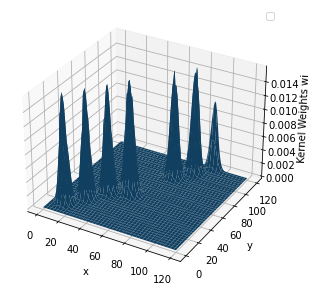

In [ ]:
gkr.visualize_kernels()

In [ ]:
gkr.predict([50,52])

2033.4977569484809

In [ ]:
WestBengal_df1

In [ ]:
#Gaussian Kernel
def gauss(x,p,h):
    return np.exp(-(np.power((x-p)/h,2)))/(np.sqrt(2*np.pi))

In [ ]:
#Ordered Discrete Kernel
def ordered(x,p,h):
    return np.power(h,np.absolute(x-p))

In [ ]:
def predicted(wc,q901r1,height,muac,wi,q104,q102,state_weight_survey, df, h,c,o):
    pred = 0
    loo_pred = 0
    sum_kernels = 0
    """print(wc)
    print(q901r1)
    print(height)
    print(muac)
    print(wi)
    print(q104)
    print(q102)
    print(state_weight_survey)"""
    for i in range(0,len(df)):
        pred = pred + final_df.iloc[i]['wc']*gauss(final_df.iloc[i]['q901r1'],wc,h)*gauss(final_df.iloc[i]['height'],height,h)*gauss(final_df.iloc[i]['muac'],muac,h)*cat(final_df.iloc[i]['q102'],q102,c,2)*cat(final_df.iloc[i]['wi'],wi,c,2)*ordered(final_df.iloc[i]['q104'],q104,o)*final_df.iloc[i]['state_weight_survey']
        sum_kernels = sum_kernels + gauss(final_df.iloc[i]['q901r1'],q901r1,h)*gauss(final_df.iloc[i]['height'],height,h)*gauss(final_df.iloc[i]['muac'],muac,h)*cat(final_df.iloc[i]['q102'],q102,c,2)*cat(final_df.iloc[i]['wi'],wi,c,2)*ordered(final_df.iloc[i]['q104'],q104,o)*final_df.iloc[i]['state_weight_survey']


    final_pred = pred/sum_kernels
    loo_pred = pred - wc*gauss(q901r1,q901r1,h)*gauss(height,height,h)*gauss(muac,muac,h)*cat(q102,q102,c,2)*cat(wi,wi,c,2)*ordered(q104,q104,o)*state_weight_survey
    loo_pred = loo_pred/(sum_kernels - gauss(q901r1,q901r1,h)*gauss(height,height,h)*gauss(muac,muac,h)*cat(q102,q102,c,2)*cat(wi,wi,c,2)*ordered(q104,q104,o)*state_weight_survey)

    #print(final_pred)
    #print(loo_pred)
    return final_pred, loo_pred

In [ ]:
#bw = 0.1 ,c = 1 ,o = 0.5
h=35
c=0.45
o=0.9
pred_list = []
loo_pred_list = []
pred_error = []
for i in range(0,len(final_df)):
    pred,loo = predicted(final_df.iloc[i]['wc'],final_df.iloc[i]['q901r1'],final_df.iloc[i]['height'],final_df.iloc[i]['muac'],final_df.iloc[i]['wi'],final_df.iloc[i]['q104'],final_df.iloc[i]['q102'],final_df.iloc[i]['state_weight_survey'],final_df,h,c,o)
    #print(pred)
    #print(loo)
    pred_list.append(pred)
    loo_pred_list.append(loo)
    pred_error.append(np.power(final_df.iloc[i]['wc']-loo,2))

final_df['pred'] = pred_list
final_df['loo'] = loo_pred_list
final_df['error'] = pred_error



print(final_df)
#print(pred_values)

In [ ]:
print(final_df)
mean_pred_error = final_df["error"].mean()
print(mean_pred_error)

In [ ]:
import matplotlib.pyplot as plt

height = [172, 171, 174, 169, 172, 173, 173, 177, 182, 180,
          181, 179, 183, 181, 186, 184, 185, 189, 184, 187]
shoe = [8.5, 7.0, 8.0, 8.0, 7.5, 9.0, 8.5, 8.0, 10.0, 9.5,
        9.5, 8.0, 11.0, 9.5, 12.0, 11.5, 9.5, 12.0, 9.5, 11.0]

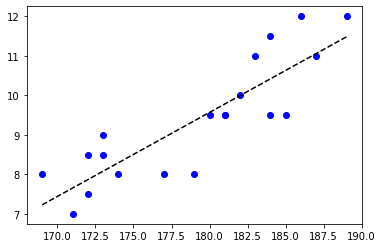

In [ ]:
plt.plot(height, shoe, 'bo')
plt.plot([169, 189], [7.23, 11.48], 'k--')

In [ ]:
mod = smf.quantreg("rbcf_1unic ~ @_zbfa",cont_df2)
res = mod.fit(q=0.2)
print(res.summary())

SyntaxError: unexpected EOF while parsing (<unknown>, line 1)

# Childhood Obesity and its determinants

2. Question - **Childhood Obesity and its determinants** :  
    Two indicators of obesity :  BMI and waist circumference
    Determinants considered -  Diet : glucose, cholesterol, types of eating,  Socio-economic Status (SES): rural urban, gender, age

    Finding -

    **Parametric model** - Apart from area, all variable has positive association with Childhood obesity. No causal statements are made.

    **Semi-parametric model** - Use two models - Partially Linear model and Ichimura single index model

## Parametric Methods - WLS

In [ ]:

X = cont_df1[['area_D','q104','q102_D','q306a', 'q306p']]
Y = cont_df1[['wc']]

X = sm.add_constant(X)
Y = Y.astype(float)

parameter_linear_model = sm.OLS(Y, X ).fit()
print(parameter_linear_model.summary())


# cereals, leafy veg, sweets

                            OLS Regression Results                            
Dep. Variable:                     wc   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     50.72
Date:                Sat, 01 Apr 2023   Prob (F-statistic):           1.56e-47
Time:                        21:32:17   Log-Likelihood:                -4303.7
No. Observations:                1145   AIC:                             8619.
Df Residuals:                    1139   BIC:                             8650.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.2790      1.900     22.256      0.0

In [ ]:
residuals_linear = parameter_linear_model.resid
MSE_parm = np.sum(residuals_linear**2)
MSE_parm

123332.58396730688

In [ ]:
y_pred_param = parameter_linear_model.predict(X)

In [ ]:
X = cont_df1[['area_D','q104','q102_D','q306a', 'q306p']]
Y = cont_df1[['wc']]

X = sm.add_constant(X)
Y = Y.astype(float)

parameter_linear_modelwls = sm.WLS(Y, X, weights=(WestBengal_df1[['state_weight_survey']])**(-1)).fit()
print(parameter_linear_model.summary())


# cereals, leafy veg, sweets

                            OLS Regression Results                            
Dep. Variable:                     wc   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     50.72
Date:                Sat, 01 Apr 2023   Prob (F-statistic):           1.56e-47
Time:                        21:32:25   Log-Likelihood:                -4303.7
No. Observations:                1145   AIC:                             8619.
Df Residuals:                    1139   BIC:                             8650.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.2790      1.900     22.256      0.0

In [ ]:
residuals_linearwls = parameter_linear_modelwls.resid

In [ ]:
MSE_parmwls = np.sum(residuals_linearwls**2)
MSE_parmwls

125453.05473621096

In [ ]:
cont_df2 =cont_df1[['area_D','q104','q102_D','q306a', 'q306p', 'q306q']]

In [ ]:
corr_matrix = cont_df2.corr()

In [ ]:
corr_matrix

,area_D,q104,q102_D,q306a,q306p,q306q
area_D,1.000000,-0.030041,0.035774,-0.054972,-0.206205,-0.177617
q104,-0.030041,1.000000,0.008085,0.039538,0.029132,0.111522
q102_D,0.035774,0.008085,1.000000,-0.084535,0.070495,0.101144
q306a,-0.054972,0.039538,-0.084535,1.000000,0.045987,-0.046907
q306p,-0.206205,0.029132,0.070495,0.045987,1.000000,0.328941
q306q,-0.177617,0.111522,0.101144,-0.046907,0.328941,1.000000


In [ ]:
name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test = sms.het_breuschpagan(parameter_linear_model.resid, parameter_linear_model.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 27.492878577931457),
 ('p-value', 0.1219579534781784),
 ('f-value', 1.3826308096484898),
 ('f p-value', 0.12084930463787821)]

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
